<a href="https://colab.research.google.com/github/gopukrisnaa/Cars-price-and-class-prediction/blob/main/CarClassPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#For numerical libraries
import numpy as np
#To handle data in the form of rows and columns
import pandas as pd
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the Encoding library
from sklearn.preprocessing import LabelEncoder
#Build the model with the best hyper parameters
from sklearn.model_selection import cross_val_score
#importing the zscore for scaling
from scipy.stats import zscore
# Import Logistic Regression machine learning library
from sklearn.linear_model import LogisticRegression 
# Import Support Vector Classifier machine learning library
from sklearn.svm import SVC
#Import Naive Bayes' machine learning Library
from sklearn.naive_bayes import GaussianNB
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
# Import the metrics
from sklearn import metrics

In [2]:
Cars=pd.read_csv('cars_class.csv')

In [3]:
Cars.columns

Index(['ID', 'Comp', 'Circ', 'D.Circ', 'Rad.Ra', 'Pr.Axis.Ra', 'Max.L.Ra',
       'Scat.Ra', 'Elong', 'Pr.Axis.Rect', 'Max.L.Rect', 'Sc.Var.Maxis',
       'Sc.Var.maxis', 'Ra.Gyr', 'Skew.Maxis', 'Skew.maxis', 'Kurt.maxis',
       'Kurt.Maxis', 'Holl.Ra', 'Class'],
      dtype='object')

***Data preprocessing***

In [4]:
print(Cars.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 719 entries, 0 to 718
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            719 non-null    int64
 1   Comp          719 non-null    int64
 2   Circ          719 non-null    int64
 3   D.Circ        719 non-null    int64
 4   Rad.Ra        719 non-null    int64
 5   Pr.Axis.Ra    719 non-null    int64
 6   Max.L.Ra      719 non-null    int64
 7   Scat.Ra       719 non-null    int64
 8   Elong         719 non-null    int64
 9   Pr.Axis.Rect  719 non-null    int64
 10  Max.L.Rect    719 non-null    int64
 11  Sc.Var.Maxis  719 non-null    int64
 12  Sc.Var.maxis  719 non-null    int64
 13  Ra.Gyr        719 non-null    int64
 14  Skew.Maxis    719 non-null    int64
 15  Skew.maxis    719 non-null    int64
 16  Kurt.maxis    719 non-null    int64
 17  Kurt.Maxis    719 non-null    int64
 18  Holl.Ra       719 non-null    int64
 19  Class         719 non-null   

In [5]:
Cars.head()

,ID,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,1,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201,0
1,2,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203,3
2,3,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
3,4,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196,1
4,5,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196,2


In [6]:
#checking the missing values
Cars.isnull().sum()

ID              0
Comp            0
Circ            0
D.Circ          0
Rad.Ra          0
Pr.Axis.Ra      0
Max.L.Ra        0
Scat.Ra         0
Elong           0
Pr.Axis.Rect    0
Max.L.Rect      0
Sc.Var.Maxis    0
Sc.Var.maxis    0
Ra.Gyr          0
Skew.Maxis      0
Skew.maxis      0
Kurt.maxis      0
Kurt.Maxis      0
Holl.Ra         0
Class           0
dtype: int64

In [7]:
Cars.shape

(719, 20)

<Axes: >

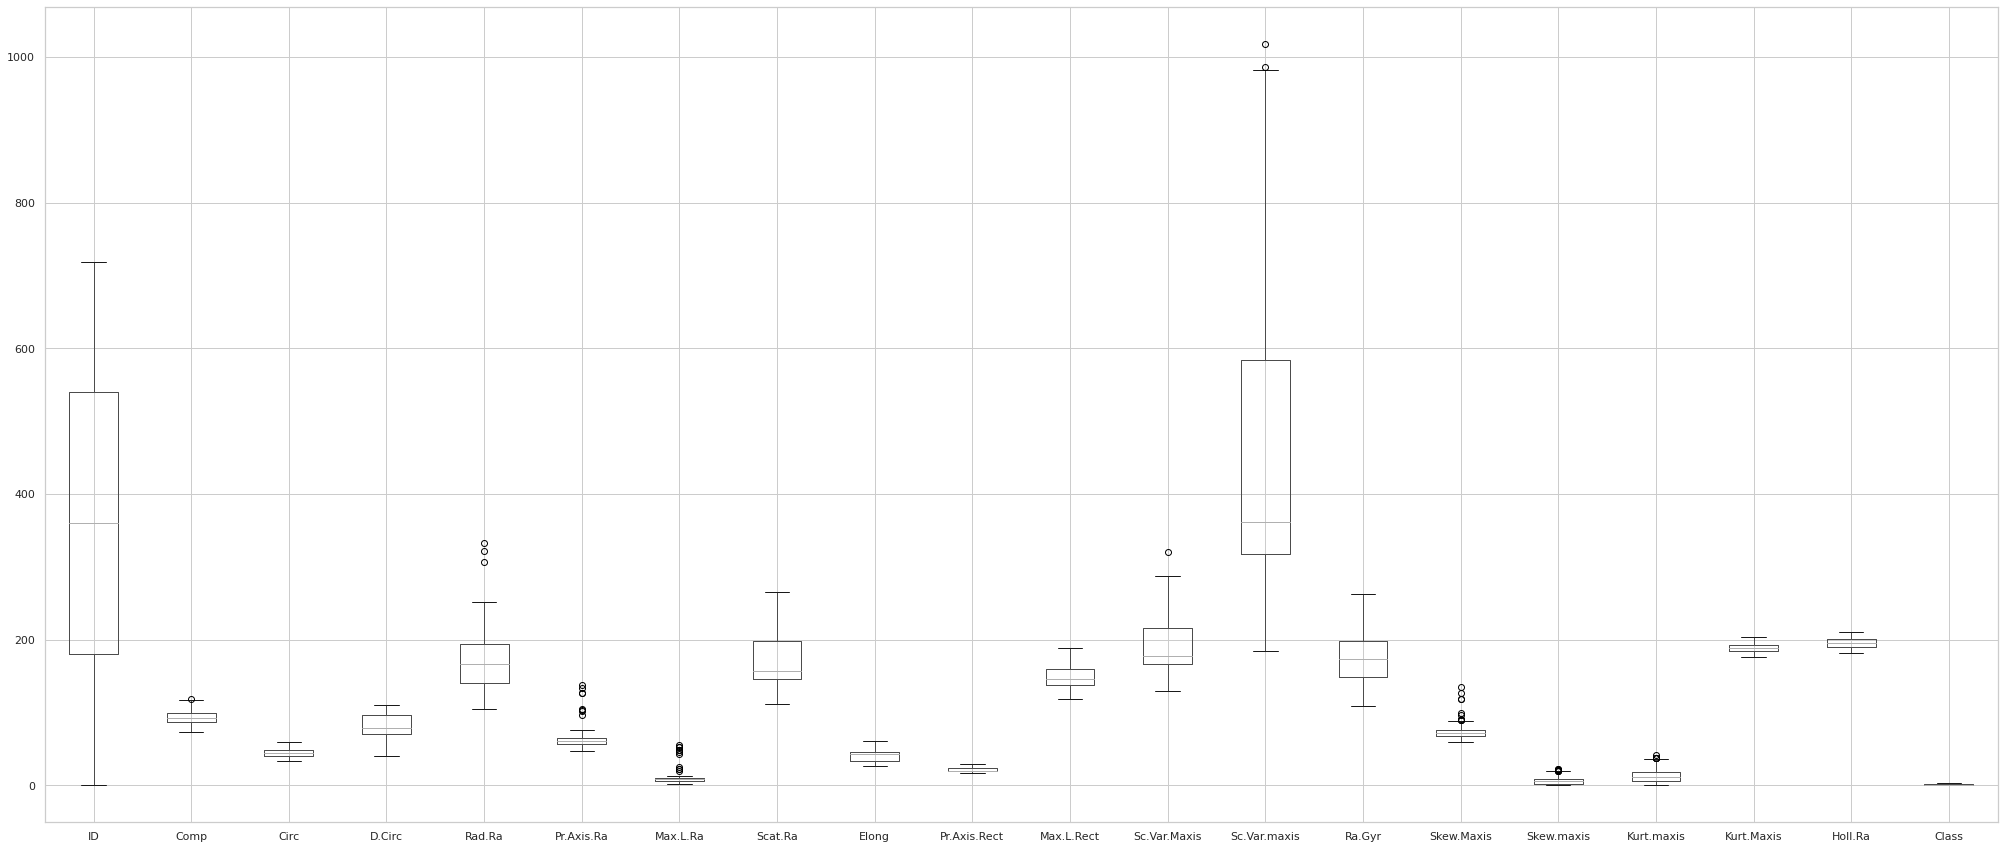

In [8]:
#Understanding the outier using boxplot

Cars.boxplot(figsize=(35,15))

There are very few outliers in columns such as Rad.ra, pr.Axis.Ra, Max. Lra

array([[<Axes: title={'center': 'ID'}>, <Axes: title={'center': 'Comp'}>,
        <Axes: title={'center': 'Circ'}>,
        <Axes: title={'center': 'D.Circ'}>],
       [<Axes: title={'center': 'Rad.Ra'}>,
        <Axes: title={'center': 'Pr.Axis.Ra'}>,
        <Axes: title={'center': 'Max.L.Ra'}>,
        <Axes: title={'center': 'Scat.Ra'}>],
       [<Axes: title={'center': 'Elong'}>,
        <Axes: title={'center': 'Pr.Axis.Rect'}>,
        <Axes: title={'center': 'Max.L.Rect'}>,
        <Axes: title={'center': 'Sc.Var.Maxis'}>],
       [<Axes: title={'center': 'Sc.Var.maxis'}>,
        <Axes: title={'center': 'Ra.Gyr'}>,
        <Axes: title={'center': 'Skew.Maxis'}>,
        <Axes: title={'center': 'Skew.maxis'}>],
       [<Axes: title={'center': 'Kurt.maxis'}>,
        <Axes: title={'center': 'Kurt.Maxis'}>,
        <Axes: title={'center': 'Holl.Ra'}>,
        <Axes: title={'center': 'Class'}>]], dtype=object)

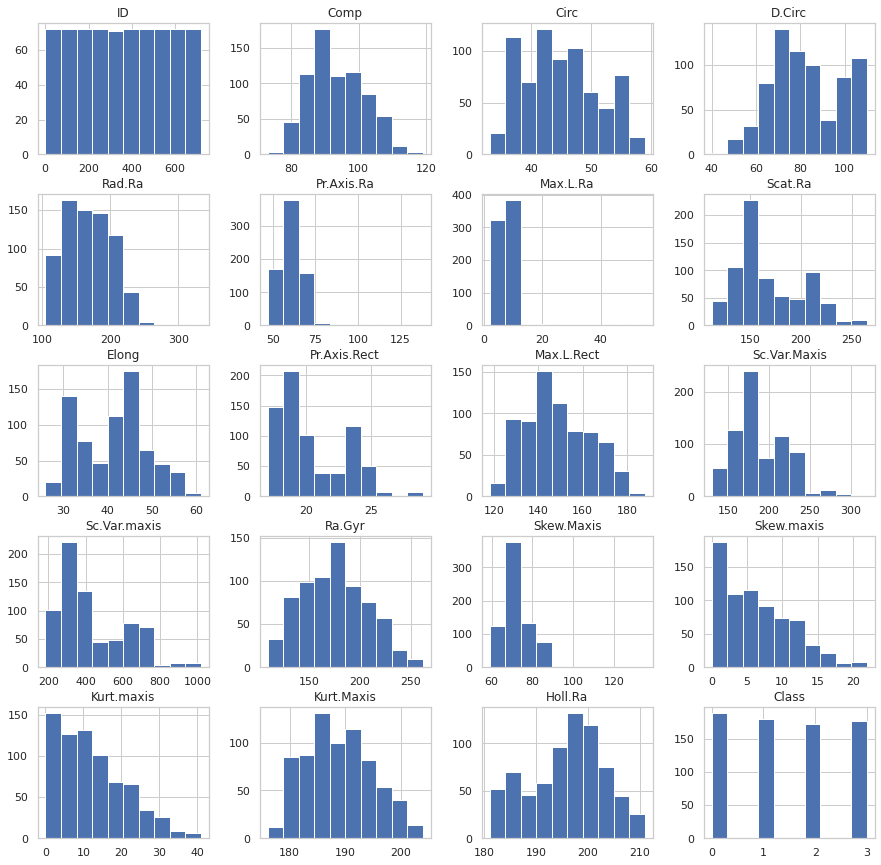

In [9]:
Cars.hist(figsize=(15,15))

Histogram shows distribtuion os attributes

Find the outliers and replace them by median using IQR method

In [10]:
#removing the ID column
cars=Cars[Cars.columns[1:]]


In [11]:
for col_name in cars.iloc[:,1:-1]:
    q1 = cars[col_name].quantile(0.25)
    q3 = cars[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    cars.loc[(cars[col_name] < low) | (cars[col_name] > high), col_name] = cars[col_name].median()

<ipython-input-11-bd029b0b16d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.loc[(cars[col_name] < low) | (cars[col_name] > high), col_name] = cars[col_name].median()
<ipython-input-11-bd029b0b16d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.loc[(cars[col_name] < low) | (cars[col_name] > high), col_name] = cars[col_name].median()
<ipython-input-11-bd029b0b16d7>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cars.l

<Axes: >

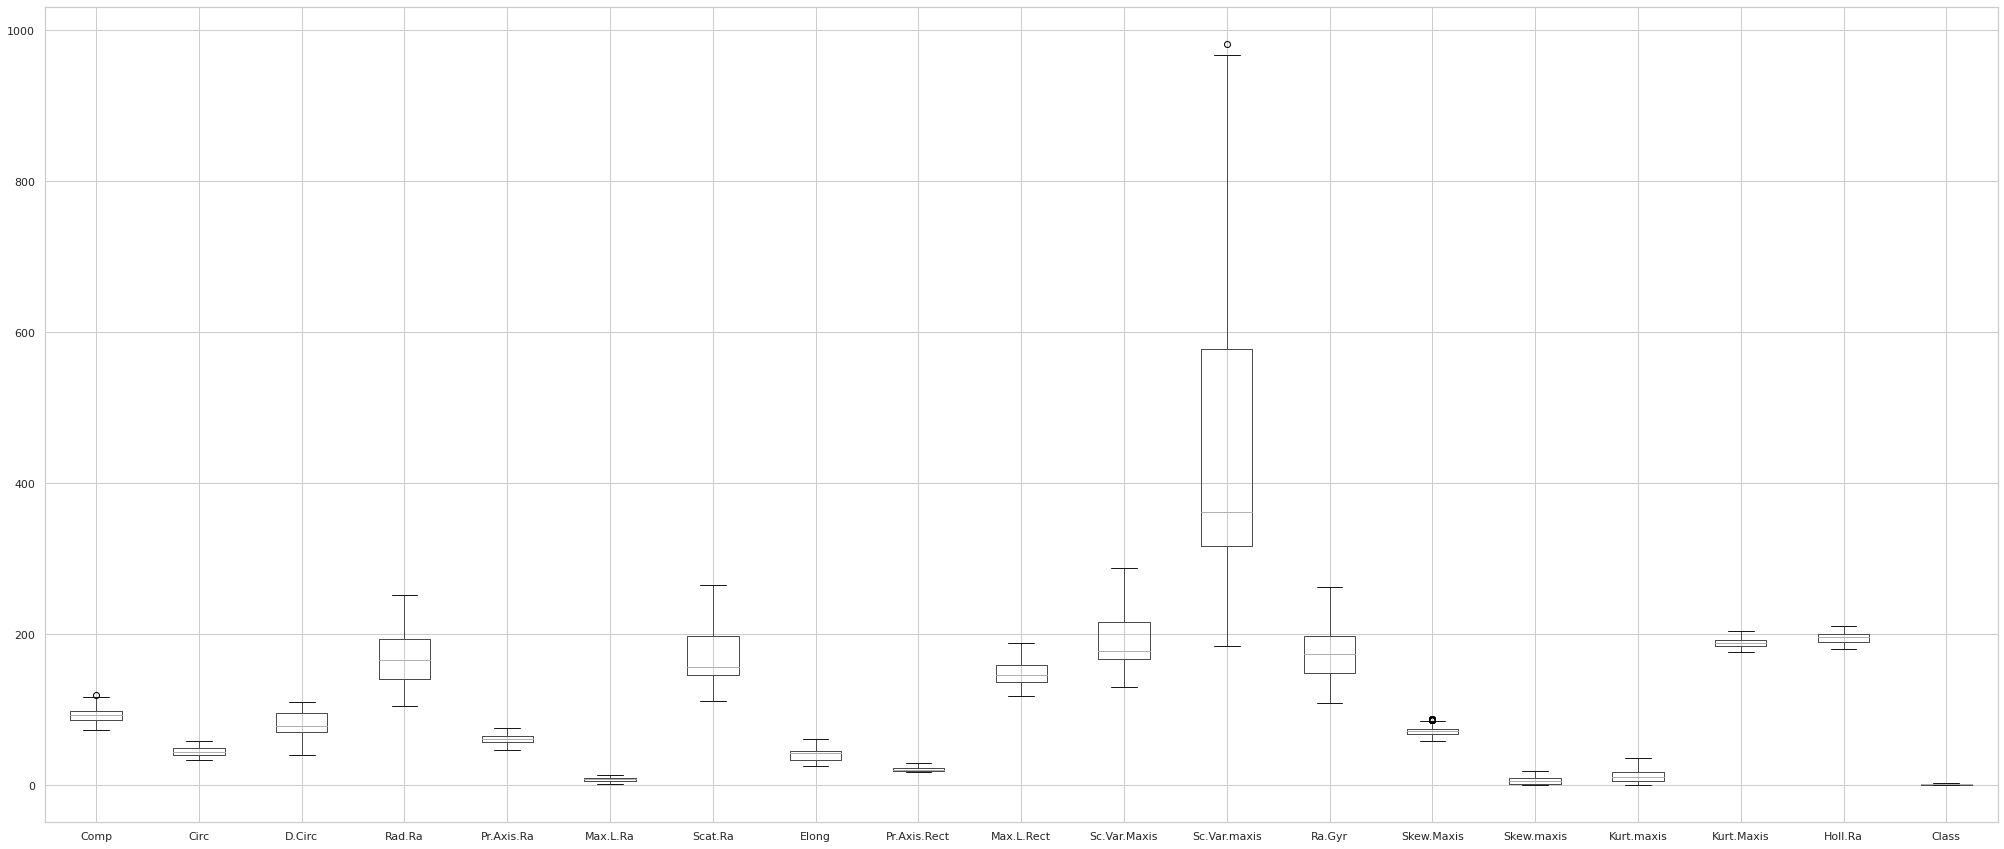

In [12]:
# again check for outliers in dataset using boxplot
cars.boxplot(figsize=(35,15))

Almost all the outliers are removed


***Understanding the attributes***

In [13]:
cars['Class'].value_counts()

0    189
1    180
3    177
2    173
Name: Class, dtype: int64

0 –bus, 1 – Opel Manta, 2 –
Saab, 3 – Van.

<Axes: xlabel='Class', ylabel='count'>

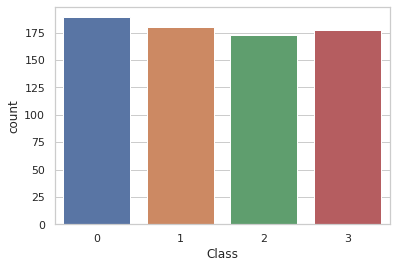

In [14]:
sns.countplot(x=cars['Class'])

Multivariate analysis

In [15]:
#correlation matrix
cor=cars.corr()
cor

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
Comp,1.000000,0.685515,0.782416,0.718267,0.214982,0.480612,0.807686,-0.784352,0.808425,0.669999,0.765540,0.806502,0.584643,-0.250920,0.178055,0.128500,0.315362,0.370891,-0.015112
Circ,0.685515,1.000000,0.799001,0.641896,0.213501,0.560472,0.860339,-0.828911,0.857357,0.965119,0.811806,0.843080,0.938749,0.070023,0.124936,-0.045877,-0.103991,0.050379,-0.171417
D.Circ,0.782416,0.799001,1.000000,0.795636,0.268239,0.662267,0.905598,-0.910257,0.894926,0.773701,0.867450,0.884908,0.715118,-0.241163,0.095565,0.213334,0.155967,0.342472,-0.070422
Rad.Ra,0.718267,0.641896,0.795636,1.000000,0.664415,0.437062,0.777389,-0.830344,0.750179,0.577057,0.797524,0.765571,0.566625,-0.380101,0.040607,0.139666,0.410417,0.485980,-0.234477
Pr.Axis.Ra,0.214982,0.213501,0.268239,0.664415,1.000000,0.142539,0.224501,-0.327469,0.188827,0.159797,0.237816,0.219126,0.173105,-0.306276,-0.048772,-0.038212,0.405675,0.417657,-0.237337
Max.L.Ra,0.480612,0.560472,0.662267,0.437062,0.142539,1.000000,0.486712,-0.495950,0.486273,0.650933,0.395239,0.464872,0.418767,-0.328510,0.082947,0.082912,0.061072,0.401580,0.324366
Scat.Ra,0.807686,0.860339,0.905598,0.777389,0.224501,0.486712,1.000000,-0.973523,0.991787,0.809629,0.959915,0.981111,0.804632,0.006499,0.053025,0.173850,0.021518,0.131811,-0.289056
Elong,-0.784352,-0.828911,-0.910257,-0.830344,-0.327469,-0.495950,-0.973523,1.000000,-0.949891,-0.773279,-0.946153,-0.951284,-0.771836,0.084422,-0.042024,-0.146504,-0.131054,-0.230072,0.338634
Pr.Axis.Rect,0.808425,0.857357,0.894926,0.750179,0.188827,0.486273,0.991787,-0.949891,1.000000,0.812405,0.946935,0.974434,0.801218,0.022023,0.061660,0.175860,-0.006111,0.109542,-0.254703
Max.L.Rect,0.669999,0.965119,0.773701,0.577057,0.159797,0.650933,0.809629,-0.773279,0.812405,1.000000,0.748691,0.790794,0.869801,0.049217,0.116726,-0.032273,-0.106711,0.081309,-0.042996


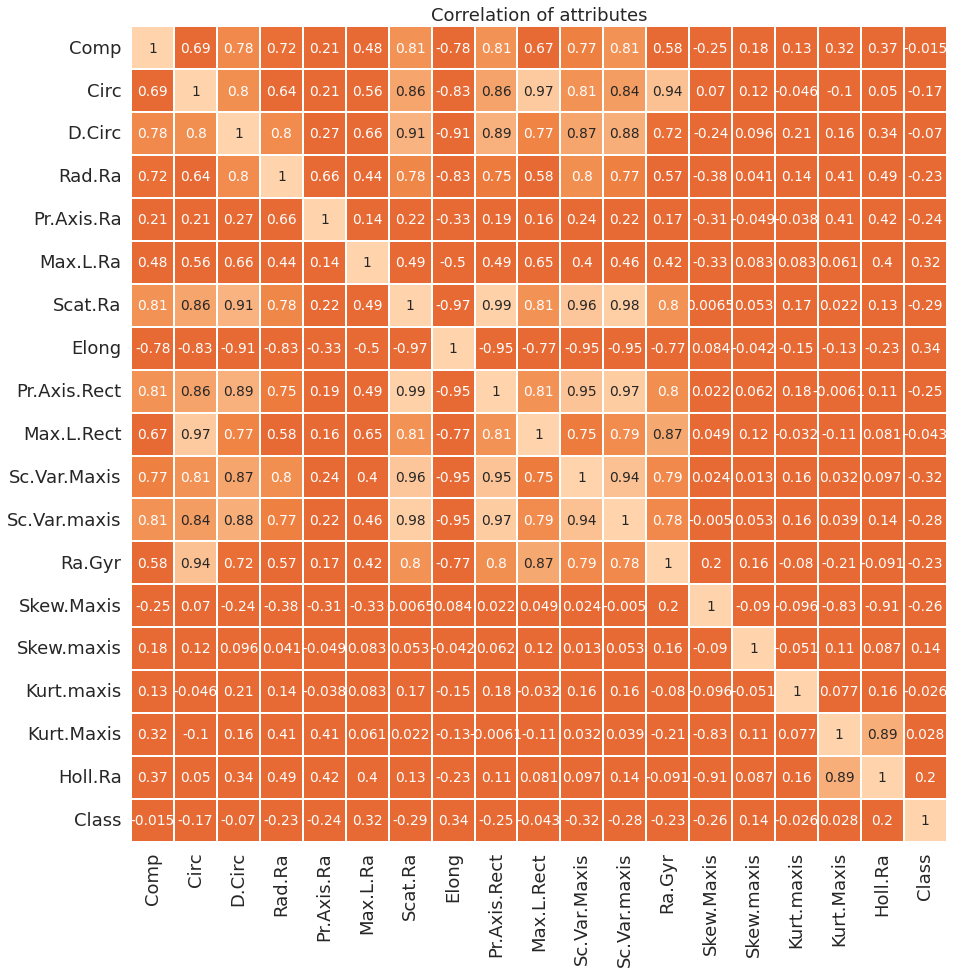

In [16]:
# correlation plot---heatmap
sns.set(font_scale=1.15)
fig,ax=plt.subplots(figsize=(18,15))
sns.heatmap(cor,vmin=0.7, annot=True,linewidths=0.01,center=0,linecolor="white",cbar=False,square=True)
plt.title('Correlation of attributes',fontsize=18)
ax.tick_params(labelsize=18)

It shows that there are some attributes which are highly correlated as there corelation value is very high.

***Creating X and y variables***

In [17]:
X=cars.iloc[:,0:18]
X

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra
0,88,39,70,166,66,7,148,44,19,134,167,332,143,69,5,13,193,201
1,85,35,64,129,57,6,116,57,17,125,138,200,123,65,1,23,196,203
2,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199
3,102,54,98,177,56,10,219,31,25,171,219,706,223,72,5,17,186,196
4,87,39,74,152,58,6,151,44,19,136,174,337,140,70,1,33,187,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,111,58,105,183,51,6,265,26,29,174,285,362,255,85,4,8,181,183
715,93,43,76,149,57,7,149,44,19,143,172,335,176,69,14,0,189,194
716,90,42,63,144,59,7,131,50,18,142,154,259,162,65,15,3,197,204
717,101,56,101,231,72,10,217,31,24,171,232,698,216,72,2,6,187,197


In [18]:
y = cars.iloc[:,18]
y

0      0
1      3
2      3
3      1
4      2
      ..
714    0
715    2
716    3
717    2
718    0
Name: Class, Length: 719, dtype: int64

***Model Building***


In [19]:

#Logistic Regression
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))

# check the accuracy on the testing data
print('Accuracy on Testing data: ',model.score(X_test , y_test))

#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))

#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.7269565217391304
Accuracy on Testing data:  0.7638888888888888
Recall value:  0.7327487244897959
Precision value:  0.728845856524428
Confusion Matrix:
 [[31  1  4  4]
 [ 1 23  9  0]
 [ 1  8 12  1]
 [ 2  0  3 44]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83        40
           1       0.72      0.70      0.71        33
           2       0.43      0.55      0.48        22
           3       0.90      0.90      0.90        49

    accuracy                           0.76       144
   macro avg       0.73      0.73      0.73       144
weighted avg       0.78      0.76      0.77       144



The accuracy, recall, and precision values using Logistic Regression model are good

In [21]:
resultsDf=pd.DataFrame({'Model':['Logistic'],'Accuracy': model.score(X_test , y_test)},index={'1'})
resultsDf=resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.763889


In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [23]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))

# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))

#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))

#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.5008695652173913
Accuracy on Testing data:  0.5347222222222222
Recall value:  0.48628826530612246
Precision value:  0.6073163622230859
Confusion Matrix:
 [[10  0  0  0]
 [ 5 10  4  1]
 [ 2 14 12  3]
 [18  8 12 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      1.00      0.44        10
           1       0.31      0.50      0.38        20
           2       0.43      0.39      0.41        31
           3       0.92      0.54      0.68        83

    accuracy                           0.53       144
   macro avg       0.49      0.61      0.48       144
weighted avg       0.68      0.53      0.56       144



In [24]:

tempResultsDf = pd.DataFrame({'Model':['Naive Bayes'], 'Accuracy': model.score(X_test, y_test)},index={'2'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.763889
2,Naive Bayes,0.534722


In [25]:
clf = SVC()
clf.fit(X_train, y_train)
prediction = model.predict(X_test)

In [26]:
# check the accuracy on the training data
print('Accuracy on Training data: ',model.score(X_train, y_train))

# check the accuracy on the testing data
print('Accuracy on Testing data: ', model.score(X_test , y_test))

#Calculate the recall value 
print('Recall value: ',metrics.recall_score(y_test, prediction, average='macro'))

#Calculate the precision value 
print('Precision value: ',metrics.precision_score(y_test, prediction, average='macro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))
print("Classification Report:\n",metrics.classification_report(prediction,y_test))

Accuracy on Training data:  0.5008695652173913
Accuracy on Testing data:  0.5347222222222222
Recall value:  0.48628826530612246
Precision value:  0.6073163622230859
Confusion Matrix:
 [[10  0  0  0]
 [ 5 10  4  1]
 [ 2 14 12  3]
 [18  8 12 45]]
Classification Report:
               precision    recall  f1-score   support

           0       0.29      1.00      0.44        10
           1       0.31      0.50      0.38        20
           2       0.43      0.39      0.41        31
           3       0.92      0.54      0.68        83

    accuracy                           0.53       144
   macro avg       0.49      0.61      0.48       144
weighted avg       0.68      0.53      0.56       144



In [27]:
tempResultsDf = pd.DataFrame({'Model':['SVM'], 'Accuracy': model.score(X_test, y_test)},index={'3'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.763889
2,Naive Bayes,0.534722
3,SVM,0.534722


Without applying PCA, we can see that Logistic Regression is performing well as compared to other meodels.


***Using Grid Search to tune model parameters***

In [28]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.748 total time=   0.1s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.748 total time=   0.1s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.757 total time=   0.1s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.826 total time=   0.1s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.757 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.270 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.270 total time=   0.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.261 total time=   0.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.270 total time=   0.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.270 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.722 total time=   0.2s
[CV 2/5] END ..............C=0.1, kernel=linear;,

In [29]:
#Build the model with the best hyper parameters
model = SVC(C=0.5, kernel="linear")
scores = cross_val_score(model, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.76388889 0.81944444 0.77777778 0.80555556 0.84722222 0.76388889
 0.86111111 0.73611111 0.81944444 0.83098592]
0.8025430359937402


In [30]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Model':['SVM Grid'], 'Accuracy': np.mean(scores)},index={'4'})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Model','Accuracy']]
resultsDf

,Model,Accuracy
1,Logistic,0.763889
2,Naive Bayes,0.534722
3,SVM,0.534722
4,SVM Grid,0.802543


We can see that Logistic Regression and SVM Grid is given better results as compared to other models so we can use either of the two models to predict one of three types of vehicle.